# Regression Analysis using Python

This notebook will cover some of the basic ways to perform regression analysis on a dataframe to predict a continuous variable

Tools and libraries used: 
  
 -Python
  
 -Jupyter notebook

 -Pandas
 
 -Numpy
 
 -Plotly
 
 -Scikit-learn (Used for sample data and regression algorithims)

## What is Regression analysis?

Regression analysis is a statistical process for estimating the relationships among variables. It includes many techniques for modeling and analyzing several variables, when the focus is on the relationship between a dependent variable and one or more independent variables (or 'predictors') -[Wiki](https://en.wikipedia.org/wiki/Regression_analysis)

## Linear Regression  

Linear regression is used to fit a straight line or 'trendline' to two variables X and Y that are dependent on each other

In this notebook I will be using a sample dataset that contains Boston House Pricing data

To get started the following libraries need to be imported. I will not import all the libraries used in this notebook here to avoid confusion. Usually though it is standard practice to import all the libraries at the top of your notebook

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
##import house price data from sklearn datasets
boston = datasets.load_boston()
#the data is imported as a json object by default
#to create a pandas dataframe from it we need to do the following

names = boston.feature_names #used to assign names to columns

bos = pd.DataFrame(boston.data) #import data into dataframe
bos.columns = names #assign column names 
bos.head() #display first five rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
target = boston.target #this is price variable what we will be trying to predict
bos['PRICE'] = target #create new column with target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#To get a description of the data we can run the following
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

To start with let's perform a very simple regression on two variables. For this i am going to choose 'RM' vs 'PRICE' as these should be directly correlated. i.e the more rooms the house has the higher its value

In [5]:
#Plotting the data to look for a linear relationship

#Here i am using the library plotly to visualise the data. 
#This package requires an account as it is hosted in the cloud. 
import plotly.plotly as plt
import plotly as py
py.tools.set_credentials_file(username='j.carpenter_12', 
                              api_key='nFGzoPt30albxesyjGOJ')
import plotly.graph_objs as go

trace = go.Scatter(x=bos.RM,
                   y=target,
                   mode ='markers')




plt.iplot([trace])


Unfortunately the interactive plotly plots on the cloud won't render on Github so I have imported them as images. If you have downloaded this notebook feel free to delete this part 

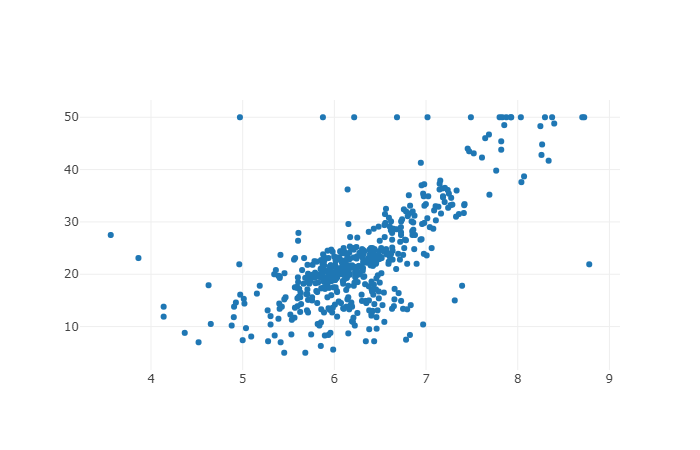

In [6]:
from IPython.display import Image #Use this to import images into jupyter
Image("images/RMvsPRICE.png")

From the above we can see that in general as the number of rooms increases so does the value of the house. Implying a linear relationship between the two variables

### Performing a linear regression

In [7]:
#Normalising the boston dataframe. 
#The purpose of this is to reduce all variables to the same scale
from sklearn import preprocessing
bos_new = bos
del bos_new['PRICE'] #Drop price variable from normalisation
val = bos_new.values
min_max_scaler = preprocessing.MinMaxScaler()
val_scaled = min_max_scaler.fit_transform(val)
bos_norm = pd.DataFrame(val_scaled,columns=bos.columns)
bos_norm.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


Once we have created our model we will need some to test it. This is where the idea of a training dataframe and a testing dataframe comes in. Train your model on one, test it on the other. Simple. 

As we only have one dataset of Boston housing data what we can do is use a sci-kitlearn package to randomly split the data into two



In [8]:
from sklearn.model_selection import train_test_split
X= pd.DataFrame(bos_norm['RM'],columns=['RM'])
y= target #This is the price column
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

Now that we have our training data let's fit our model 

In [9]:
from sklearn import linear_model
lr = linear_model.LinearRegression() 
lr.fit(X_train,y_train) #Fit the model on the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
#Predict price on test data
predicted = lr.predict(X_test)
lr_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
lr_predictions[:20]

,Actual,Predicted
0,23.6,23.740350
1,32.4,26.795459
2,13.6,19.872333
3,22.8,20.604844
4,16.1,22.677315
5,20.0,22.516520
6,17.8,19.255951
7,14.0,21.578548
8,19.6,22.069867
9,16.8,20.265388


From the above we can see that at certain points the model is quite close to the actual values but sometimes quite far off. We can get the score and mean square error for our model as follows:

'The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. For every data point, you take the distance vertically from the point to the corresponding y value on the curve fit (the error), and square the value. Then you add up all those values for all data points, and, in the case of a linear fit, divide by the number of points minus two.** The squaring is done so negative values do not cancel positive values. The smaller the Mean Squared Error, the closer the fit is to the data. The MSE has the units squared of whatever is plotted on the vertical axis.' - [vernier](https://www.vernier.com/til/1014/)

In [11]:
#Actual vs predicted score
score = lr.score(X_test,y_test)
#Mean squared error
mseFull = np.mean((y_test - lr.predict(X_test))**2)

print("Accuracy of model: %f" % score)
print("Mean Squared Error: %f" % mseFull)

Accuracy of model: 0.594613
Mean Squared Error: 26.473346


In [12]:
def draw_graph(df,title):
    #Plot of linear regerssion
    trace = go.Scatter(x=df['Actual'].values,
                       y=df['Predicted'].values,
                       mode ='markers')
    
    trace2 = go.Scatter(x = df['Actual'].values,
                        y = df['Actual'].values,
                        mode = 'lines',
                        name = 'lines'
                        )

    layout = go.Layout(
        title="%s" % title,
        xaxis=dict(
            title='Actual',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title='Predicted',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
    data = [trace,trace2]
    fig = go.Figure(data=data,layout=layout)
    return plt.iplot(fig)

Here I have created a python function as I will be plotting similar graphs later on

In [13]:
draw_graph(lr_predictions,'Linear Regression')

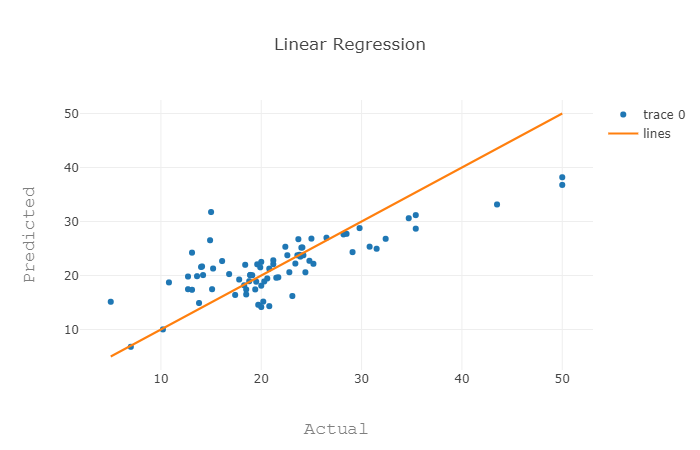

In [14]:
Image("images/LR.png")

As you can see our model only has an accuracy of 59%, not great. We are only using one variable to predict Price out of a possible 13 to predict the Price. In the next section we will look at using multiple variables in a linear regression in an effort to improve the model. The graph above is a scatter of the predicted vs actual. The closer to the line, the better our fit on the data

## Multiple Linear Regression

A multiple linear regression is used to predict a target variable Y using two or more independent variables X1,X2,X3...

As we have already created a normalised dataset of the entire Boston set we can just reuse that here to create our training data for multiple variables


In [15]:
X= bos_norm
y= target #This is the price column
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [16]:
mlr = linear_model.LinearRegression() 
mlr.fit(X_train,y_train) #Fit the model on the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
#Predict price on test data 
predicted = mlr.predict(X_test)
mlr_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
mlr_predictions[:20]

,Actual,Predicted
0,23.6,29.434253
1,32.4,36.135564
2,13.6,14.300537
3,22.8,24.865454
4,16.1,18.936624
5,20.0,23.336226
6,17.8,17.561542
7,14.0,13.639191
8,19.6,23.769703
9,16.8,20.669951


In [18]:
#Actual vs predicted score
score = mlr.score(X_test,y_test)
#Mean squared error
mseFull = np.mean((y_test - mlr.predict(X_test))**2)

print("Accuracy of model: %f" % score)
print("Mean Squared Error: %f" % mseFull)

Accuracy of model: 0.789701
Mean Squared Error: 13.733307


In [19]:
draw_graph(mlr_predictions,'Multiple Linear Regression')

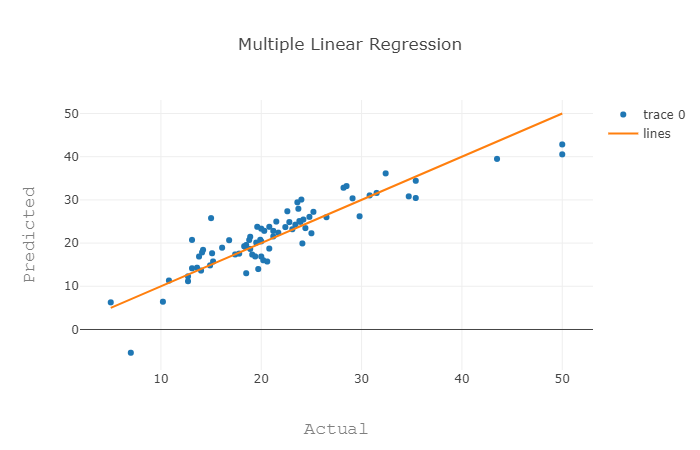

In [20]:
Image("images/MLR.png")

As you can see by adding multiple variables to our model we have increased our prediction accuracy by almost 20%. In the next section we will look at analysing the independent variables further to see if we can improve the model by removing certain ones from it, as so far we have only used one or all of them in the predictions

## Feature Selection


In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction.

The central premise when using a feature selection technique is that the data contains many features that are either redundant or irrelevant, and can thus be removed without incurring much loss of information. Redundant or irrelevant features are two distinct notions, since one relevant feature may be redundant in the presence of another relevant feature with which it is strongly correlated. [wiki](https://en.wikipedia.org/wiki/Feature_selection)

In [21]:
from sklearn.feature_selection import SelectFromModel 

# This will throw out any variables that fall below this threshold
sfm = SelectFromModel(lr,threshold=0.10) 
sfm.fit(X_test,y_test)
n_features = sfm.transform(X_test).shape[1]


In [22]:
features = pd.DataFrame({'n_features':n_features,'score':score,'MSE':mseFull},index=[0])
while n_features > 1:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X_test)
    n_features = X_transform.shape[1]
    lr.fit(X_transform,y_test)
    score = lr.score(X_transform,y_test)
    mseFull = np.mean((y_test - lr.predict(X_transform))**2)
    temp = pd.DataFrame({'n_features':n_features,'score':score,'MSE':mseFull},index=[0])
    features = features.append(temp)
    

group_features = features.groupby(features['n_features'],as_index=False).last()
group_features


,MSE,n_features,score
0,25.636478,1,0.607428
1,21.903709,2,0.664588
2,15.159241,3,0.767866
3,14.368996,4,0.779967
4,12.359029,5,0.810746
5,9.312791,6,0.857393
6,9.276388,7,0.857950
7,8.501195,8,0.869821
8,8.124666,9,0.875587
9,8.017986,10,0.877220


I won't go into too much detail about the above but essentially what the while loop is doing is fitting a linear regression with variables of increasing importance on Y. As you can see from the table however we can see that the more variables we have the better the score and so there is no need to remove certain ones to improve our model

## Decision Tree Learning


#### Decision Trees vs Linear Regression


- If the relationship between dependent & independent variable is well approximated by a linear model, linear regression will outperform tree based model.
- If there is a high non-linearity & complex relationship between dependent & independent variables, a tree model will outperform a classical regression method.
- If you need to build a model which is easy to explain to people, a decision tree model will always do better than a linear model. Decision tree models are even simpler to interpret than linear regression

[source](https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/)

#### How Decision Tree Learning works

Decision tree algorithms are used in a similar way to linear regression with the end goal to predict a target variable based off of the input of several other variables. Decision Trees are much better at predicting non-linear relationships but can also suffer from over fitting (this is where the model is too closely fitted on the training set and as a result is not as useful predictor on more generalised data).

They are classed as a supervised learning method and work by splitting the input data into two or more homogeneous sets based on the the most significant splitter. [source](https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/)

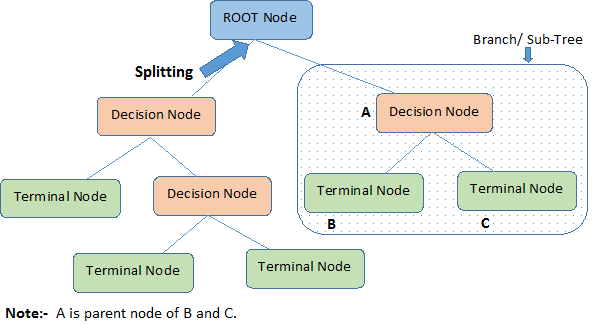

In [23]:
Image("images/dt_nodes.png")

- Root Node: It represents entire population or sample and this further gets divided into two or more homogeneous sets.
- Splitting: It is a process of dividing a node into two or more sub-nodes.
- Decision Node: When a sub-node splits into further sub-nodes, then it is called decision node.
- Leaf/ Terminal Node: Nodes do not split is called Leaf or Terminal node.

#### How does the decision tree decide where to split?

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable. Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes. [Source](https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/)

#### Titanic example

This is an example from this [blog post](http://trevorstephens.com/kaggle-titanic-tutorial/r-part-3-decision-trees/) of a very basic decision tree predicting whether someone survived or died on the Titanic



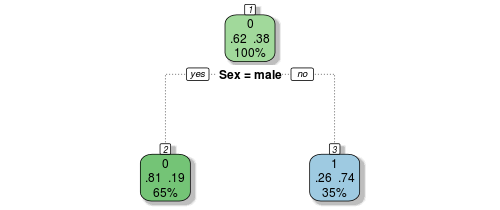

In [24]:
Image("images/titanic1.png")

[image source](http://trevorstephens.com/images/2014-01-13-r-part-3-decision-trees-1.png)

The decision tree first splits on gender as it is one of the strongest indicator variables in terms of survival. 

  - The top node denotes all passengers (62% died, 38% survived)
  - If the passenger is male go left, if female move right
  - From the male node we see that only 19% survived and 81% died. Where as female 26% died and 74% survived.
  - The two bottom nodes are leaf nodes or 'terminal nodes'. This is the most basic decision tree you could use,
    if we were to run this model on some test data we would see that it would predict that all female passengers
    survived(denoted by the '1' at the top of the node) and all male passengers died(0)



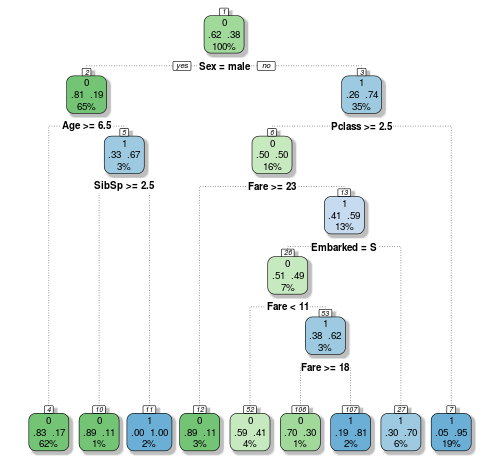

In [25]:
Image("images/titanic2.png")

[image source](http://trevorstephens.com/images/2014-01-13-r-part-3-decision-trees-2.png)

Above is an expanded decision tree splitting on more nodes to make a prediction. In this model we can see that now the model takes further variables into account like age, whether they had siblings on board (SibSp) and passenger class to make a prediction. For example if a passenger is male but under the age of 6.5 and with less than 2.5 siblings they all survived in the training data so the decision tree would predict that any other passengers in the test set that had those attributes would also survive.

#### Key Parameters of a Decision Tree

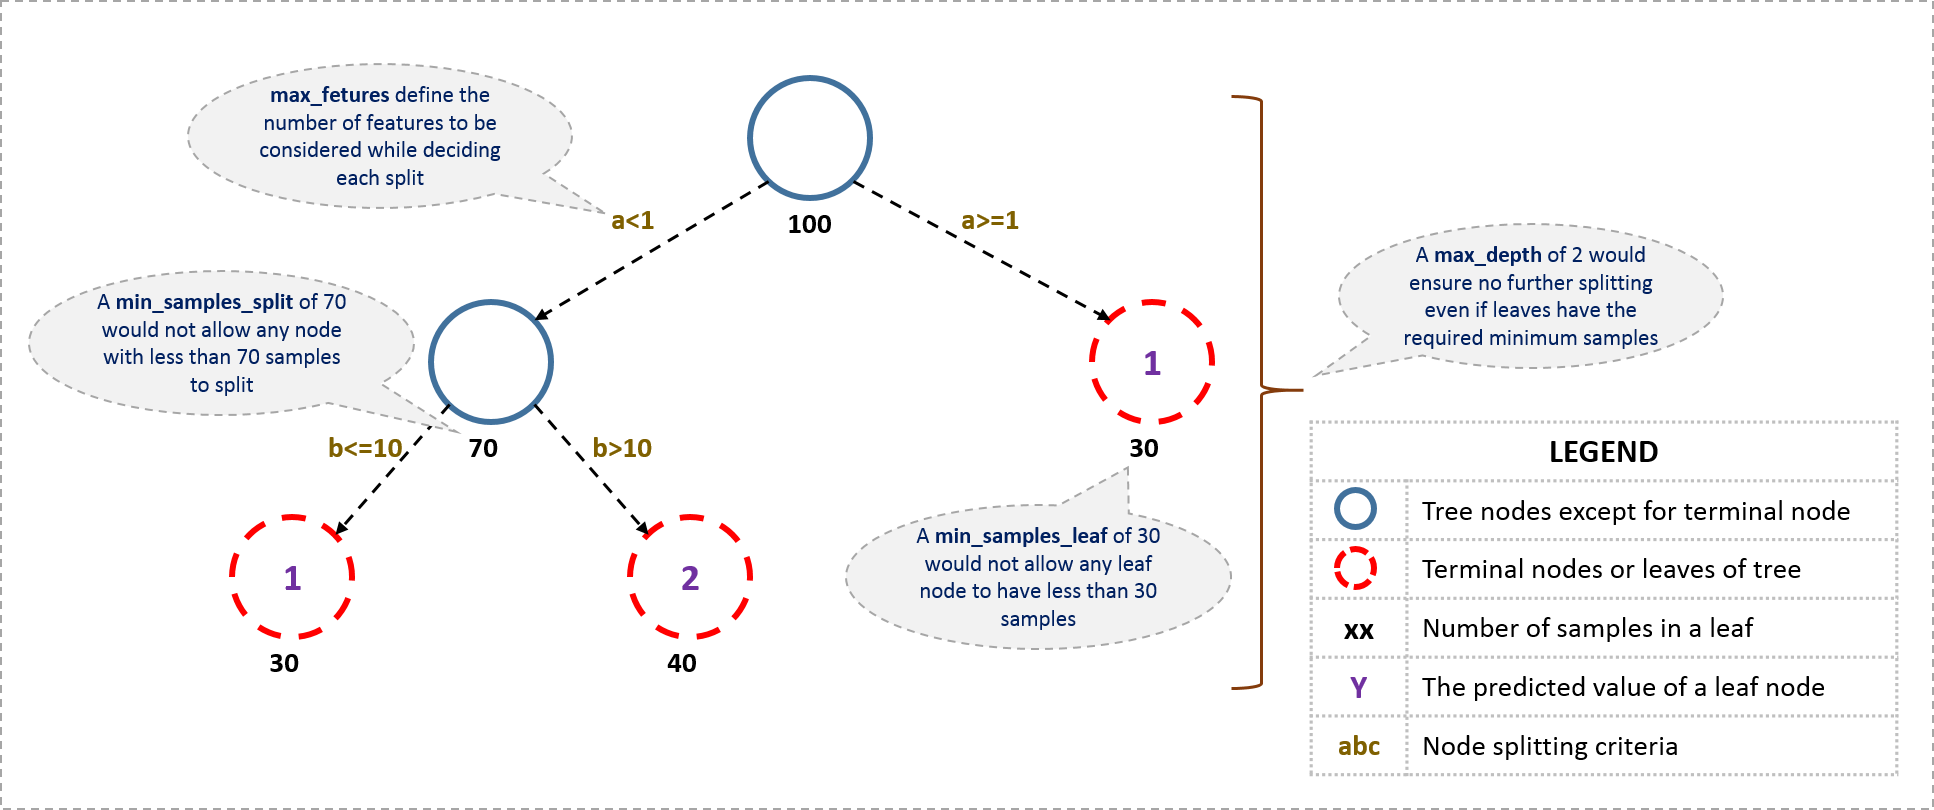

In [26]:
Image("images/tree-infographic.png")

[image source](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/tree-infographic.png)

- Minimum samples for a node split
  - Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
  - Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the       particular sample selected for a tree.
  - Too high values can lead to under-fitting hence, it should be tuned using CV.
- Minimum samples for a terminal node (leaf)
  - Defines the minimum samples (or observations) required in a terminal node or leaf.
  - Used to control over-fitting similar to min_samples_split.
  - Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will       be in majority will be very small.
- Maximum depth of tree (vertical depth)
  - The maximum depth of a tree.
  - Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
  - Should be tuned using CV.
- Maximum number of terminal nodes
  - The maximum number of terminal nodes or leaves in a tree.
  - Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
- Maximum features to consider for split
  - The number of features to consider while searching for a best split. These will be randomly selected.
  - As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number   of features.
  - Higher values can lead to over-fitting but depends on case to case.

I will not go into too much more detail about how decision trees work here as [this article](https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/) by the Analytics Vidhya team (from which I have pulled most of the above information from) explains it far better than I can and would highly recommend using it as a reference whenever you are using decision trees

Please also note that in the following examples we will be using a decision tree regressor and the examples above are of a decision tree classifier. The difference being that the regression model predicts a continuous variable and the classification a categorical value. In case of regression tree, the value obtained by terminal nodes in the training data is the mean response of the observation in that region. For more information please see the above article

In [27]:
#As we are predicting a continuous variable, we import the regressor
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 100,
                            max_depth=5, min_samples_leaf=5)

#I have set the above max_depth here to account for every variable


dtr.fit(X_train, y_train)


predicted = dtr.predict(X_test)

dtr_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})

dtr_predictions[:20]


,Actual,Predicted
0,23.6,21.070896
1,32.4,30.050000
2,13.6,16.823810
3,22.8,23.908571
4,16.1,16.823810
5,20.0,21.070896
6,17.8,18.589474
7,14.0,14.455556
8,19.6,21.070896
9,16.8,21.070896


In [28]:
#Model score 
score = dtr.score(X_test,y_test)
mseFull = np.mean((y_test - predicted)**2)

print("Accuracy of model: %f" % score)
print("Mean Squared Error: %f" % mseFull)

Accuracy of model: 0.864029
Mean Squared Error: 8.879419


In [29]:
draw_graph(dtr_predictions,'Decision Tree Regression')

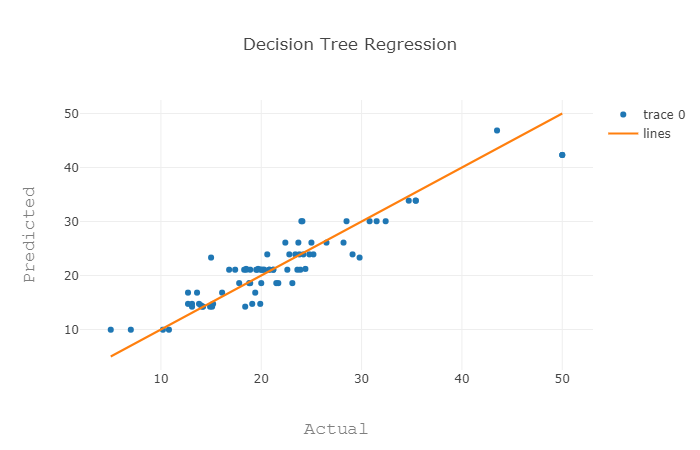

In [30]:
Image("images/DTR.png")

From the above we can see that a decision tree has done considerably better than both types of linear regression. This is without 'tuning' the model. Decision trees have many different hyper parameters one can set when using them but trying to improve the model by trial and error would take time. This is where grid search and cross validation come in

## Grid Search & Cross Validation

Grid Search in its simplest terms is used to run a model repeatedly each time with differing parameters specified by the user. Cross validation is used to subset the data to create a test in order to evaluate each of these with a score

In [31]:
from sklearn.model_selection import GridSearchCV

params ={'max_depth':[1,2,3,4,5,6,7,8],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]
         }
grid_search = GridSearchCV(dtr,param_grid=params,cv=5)
grid_search.fit(X_train, y_train)


print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

predicted = grid_search.predict(X_test)

grid_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
score = grid_search.score(X_test,y_test)
print("predicted score against actual: %f" % score)
grid_predictions.head()


Best score: 0.8167652691302683
Best parameters: {'max_depth': 6, 'min_samples_leaf': 3}
predicted score against actual: 0.898348


,Actual,Predicted
0,23.6,20.844961
1,32.4,31.291667
2,13.6,16.823810
3,22.8,23.542857
4,16.1,16.823810


In [32]:
draw_graph(grid_predictions,'Decision Grid Search Regression')

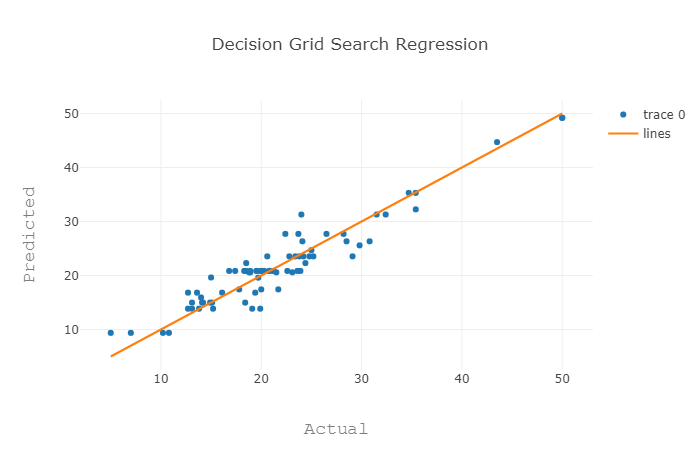

In [33]:
Image("images/DTR_GRID.png")

Here i have only varied both the max_depth and min_samples_leaf but already we can see that the model's accuracy has increased by 3%. There are many more parameters you could vary with grid search but it is worth noting that the more parameter variation you have the longer it will take to run as it will run every combination 

## Random Forest Model

A Random Forest as the name suggests is a collection of decision trees. It randomly subsets the data and feeds it into decision trees, also sometimes referred to as 'bagging'. This is particularly useful as decision trees are prone to overfitting (overfitting is an issue where the model is too closely matched on the training data and consequently gives bad predictions on the test data as it is not general enough).A random forest reduces this by running each decision tree on different subset of the data and then making a prediction based on the aggregate of the predictions of all the trees in the forest 

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 250, random_state = 100,oob_score=True,
                               max_depth=3, min_samples_leaf=5,n_jobs=-1)


rf.fit(X_train, y_train)
predicted = rf.predict(X_test)
rf_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
rf_score = rf.score(X_test,y_test)
print("predicted score against actual: %f" % rf_score)
rf_predictions.head()

predicted score against actual: 0.848783


,Actual,Predicted
0,23.6,23.142567
1,32.4,28.093789
2,13.6,15.516161
3,22.8,24.002485
4,16.1,15.412454


Grid search on random forest to tune model

In [35]:
params ={'n_estimators':[130,140,150],'max_depth':[10,11,12,13],
         'min_samples_leaf':[3,4,5,6]
         }
grid_search = GridSearchCV(rf,param_grid=params)
grid_search.fit(X_train, y_train)


print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

predicted = grid_search.predict(X_test)

grid_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
score = grid_search.score(X_test,y_test)
print("predicted score against actual: %f" % score)
grid_predictions.head()


Best score: 0.8249648203806896
Best parameters: {'max_depth': 12, 'min_samples_leaf': 3, 'n_estimators': 140}
predicted score against actual: 0.893745


,Actual,Predicted
0,23.6,22.997190
1,32.4,30.823742
2,13.6,16.529123
3,22.8,23.245938
4,16.1,16.978538


In [36]:
draw_graph(grid_predictions,'Random Forest Regression')

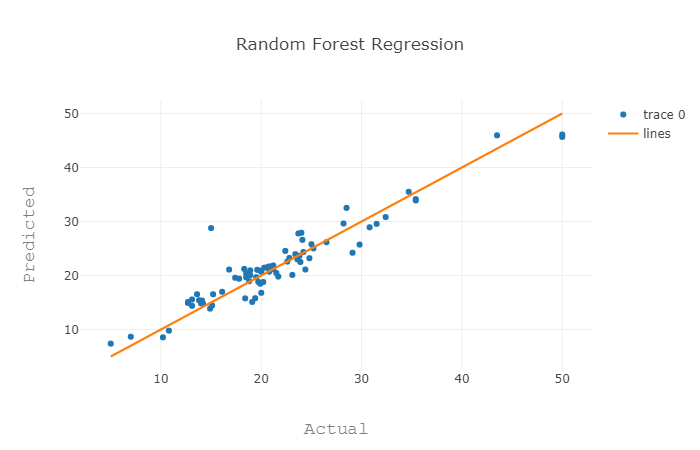

In [37]:
Image("images/RF_GRID.png")

From the above we can see that the random forest actually scores slightly lower on the test data, but scores higher on the grid_search score. The reason for this might be that the test data we are using just happens to fit that model better than the random forest and might be different for other data as the subset we are using is fairly small for testing

## Gradient Boosted Regression

Gradient boosted regression functions in a similar way to a random forest. Instead of creating x number of decision trees and aggregating them a boosted learning algorithm will perform the same basic process of building a learning algorithm on samples of data but will assign a higher and higher weight to a hard to classify observation. 

For example if we considered any model to predict y as simply a function of X with some error like so

\begin{equation*}
  F_1(x) = y + error
\end{equation*}

The error or 'residual' as it more commonly referred to is the difference between the predicted value and the actual value. If instead of thinking of this error as 'white noise' we instead think of them as having some relation to y we can then fit a model on the residual leaving us with the equation

\begin{equation*}
   error = G_1(x) + error2
\end{equation*}

and then again 

\begin{equation*}
   error2 = H_1(x) + error3
\end{equation*}

and again

\begin{equation*}
   error3 = H_1(x) + error4
\end{equation*}

Substituting this back into the original equation gives us the following 

\begin{equation*}
  y = F_1(X) + G_1(X) + H_1(X) + error4
\end{equation*}

The error is reduced by fitting the residual to a new model again and again. The gradient boosting algorithm will then assign weights to each of these new model to create 


\begin{equation*}
  y = a * F_1(X) + b * G_1(X) + g * H_1(X) + error4
\end{equation*}


This is a very basic overview of the process as I understand it. By fitting new models on the residuals recursively and summing them to the original model they help to reduce the mean squared error and therefore increase the accuracy of the model. 

[This article](https://www.analyticsvidhya.com/blog/2015/09/complete-guide-boosting-methods/) by Tavish Srivastava and [this article](https://gormanalysis.com/gradient-boosting-explained/) by Ben Gorman do a very good job of explaining a difficult to understand topic whilst also going into far more detail than I am able to. 



### GBM parameters and model

GBM parameters can generally be though of as 
 - Tree-Specific Parameters: These affect each individual tree in the model
 - Boosting Parameters: These affect the boosting operation of the model
 - Misc Parameters: Other parameters for overall functioning
 

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators= 15, random_state = 100,
                               max_depth=3, min_samples_leaf=5,learning_rate=0.2)


gbr.fit(X_train, y_train)
predicted = gbr.predict(X_test)
gbr_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
gbr_score = gbr.score(X_test,y_test)
print("predicted score against actual: %f" % gbr_score)
gbr_predictions.head()


predicted score against actual: 0.898410


,Actual,Predicted
0,23.6,23.116148
1,32.4,29.078630
2,13.6,16.753154
3,22.8,23.278058
4,16.1,16.734608


In [39]:
params ={'max_depth':range(1,10,2),
         'min_samples_split':range(50,200,50),
         'n_estimators':range(50,80,10),
         'learning_rate':[0.1,0.05]
         }
grid_search = GridSearchCV(gbr,param_grid=params)
grid_search.fit(X_train, y_train)


print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

predicted = grid_search.predict(X_test)

grid_predictions = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
score = grid_search.score(X_test,y_test)
print("predicted score against actual: %f" % score)
grid_predictions.head()

Best score: 0.8522559570386447
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 50, 'n_estimators': 70}
predicted score against actual: 0.932982


,Actual,Predicted
0,23.6,24.338496
1,32.4,31.228680
2,13.6,16.286739
3,22.8,22.305120
4,16.1,17.061458


In [40]:
draw_graph(grid_predictions,'Gradient Boosted Regression')

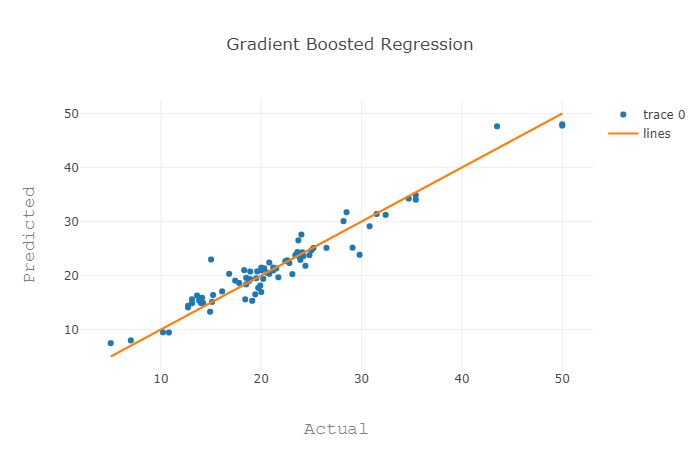

In [41]:
Image("images/GB_GRID.png")

From the scores we can see that the gradient boosted model by far performs the best, scoring a 93% accuracy rating on its predictions. I have spent some time tuning this model but as always finer tuning could be applied to improve it further. With these decision tree algorithms it always helps to read up on them as much as possible as the better you understand how they work the better you will be able to use them. I will include some links below that I have found particularly useful when putting this together

[gradient_boosting](https://www.analyticsvidhya.com/blog/2015/09/complete-guide-boosting-methods/)

[guide to tuning params of gradient boosting](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/)

[7 types of regression techniques](https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/)